## Background 

- The data consists of measurements made on patients with malignant melanoma. 

- Each patient had their tumour removed by surgery at the Department of Plastic Surgery, University Hospital of Odense, 

- Denmark during the period 1962 to 1977. The surgery consisted of complete removal of the tumour together with about 2.5cm of the surrounding skin.
- Among the measurements taken were the thickness of the tumour and whether it was ulcerated or not. These are thought to be important prognostic variables in that patients with a thick and/or ulcerated tumour have an increased chance of death from melanoma. 

- Patients were followed until the end of 1977. 


#### Data dictionary 

| Column     | Description                                    | Data Elements Description                                      | Data Type |
|------------|------------------------------------------------|----------------------------------------------------------------|-----------|
| time       | Survival time in days since the operation.     |                                                                | int64     |
| status     | Outcome of the patient at the end of the study.| 1 for death from melanoma, 2 for alive, and 3 for death from causes unrelated to melanoma. | int64     |
| sex        |The patient's sex.                              | 1 for male, 0 for female.                                        | int64     |
| age        | Age in years at the time of the operation.     |                                                                | int64     |
| year       | Year of operation.                             |                                                                | int64     |
| thickness  | Tumor thickness in millimeters.                |                                                                | float64   |
| ulcer      | Indicator of ulceration.                       | 1 if present, 0 if absent.                                     | int64     |

# Loading modules 

Importing required packages 

In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.express as px
import scipy.stats as stats 
import pingouin
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
import sklearn
%matplotlib inline
import warnings 

/Users/jaynahalai/anaconda3/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



In [ ]:
# !pip install statsmodels

# Data Ingestion 

In [9]:
#Loading the dataset 
df=pd.read_csv('melanoma.csv')

# Data Overview 

In [10]:
# Display the first five rows
df.head()

,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1


In [11]:
# Display the  five rows
df.tail()

,time,status,sex,age,year,thickness,ulcer
200,4492,2,1,29,1965,7.06,1
201,4668,2,0,40,1965,6.12,0
202,4688,2,0,42,1965,0.48,0
203,4926,2,0,50,1964,2.26,0
204,5565,2,0,41,1962,2.90,0


In [12]:
#Checking if the shape matched the expected dimensons of the data frame 
df.shape

(205, 7)

**Commentary:** This Dataset has 7 columns and 205 rows of data

In [13]:
# Reviewing data structure and completeness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       205 non-null    int64  
 1   status     205 non-null    int64  
 2   sex        205 non-null    int64  
 3   age        205 non-null    int64  
 4   year       205 non-null    int64  
 5   thickness  205 non-null    float64
 6   ulcer      205 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.3 KB


In [18]:
#Coverts numeric data representing categorical variables into corresponding descriptive labels using predefined functions and conditional statements.
df['sex'].replace({1:'Male',0:'Female'},inplace=True)
df['ulcer'].replace({1:'Present',0:'Absent'},inplace=True)
df['status'].replace({1:'Melanoma_death',2:'Alive',3:'Not_melanoma_death'},inplace=True)

# Preview New data frame 
df.head()

,time,status,sex,age,year,thickness,ulcer
0,10,Not_melanoma_death,Male,76,1972,6.76,Present
1,30,Not_melanoma_death,Male,56,1968,0.65,Absent
2,35,Alive,Male,41,1977,1.34,Absent
3,99,Not_melanoma_death,Female,71,1968,2.90,Absent
4,185,Melanoma_death,Male,52,1965,12.08,Present


In [21]:
#Preview summary statistics for numerical columns  
df.describe()

,time,age,year,thickness
count,205.000000,205.000000,205.000000,205.000000
mean,2152.800000,52.463415,1969.907317,2.919854
std,1122.060667,16.671711,2.575563,2.959433
min,10.000000,4.000000,1962.000000,0.100000
25%,1525.000000,42.000000,1968.000000,0.970000
50%,2005.000000,54.000000,1970.000000,1.940000
75%,3042.000000,65.000000,1972.000000,3.560000
max,5565.000000,95.000000,1977.000000,17.420000


In [22]:
#Preview summary statistics for Categorical columns  
df.describe(include="O")

,status,sex,ulcer
count,205,205,205
unique,3,2,2
top,Alive,Female,Absent
freq,134,126,115


# Univartiate Analysis 
Univariate analysis examines the distribution and characteristics of a single variable, aiming to understand its central tendency, dispersion, and shape to uncover patterns and insights within the data.

### Time

In [116]:
df[['time']].describe()

,time
count,205.000000
mean,2152.800000
std,1122.060667
min,10.000000
25%,1525.000000
50%,2005.000000
75%,3042.000000
max,5565.000000


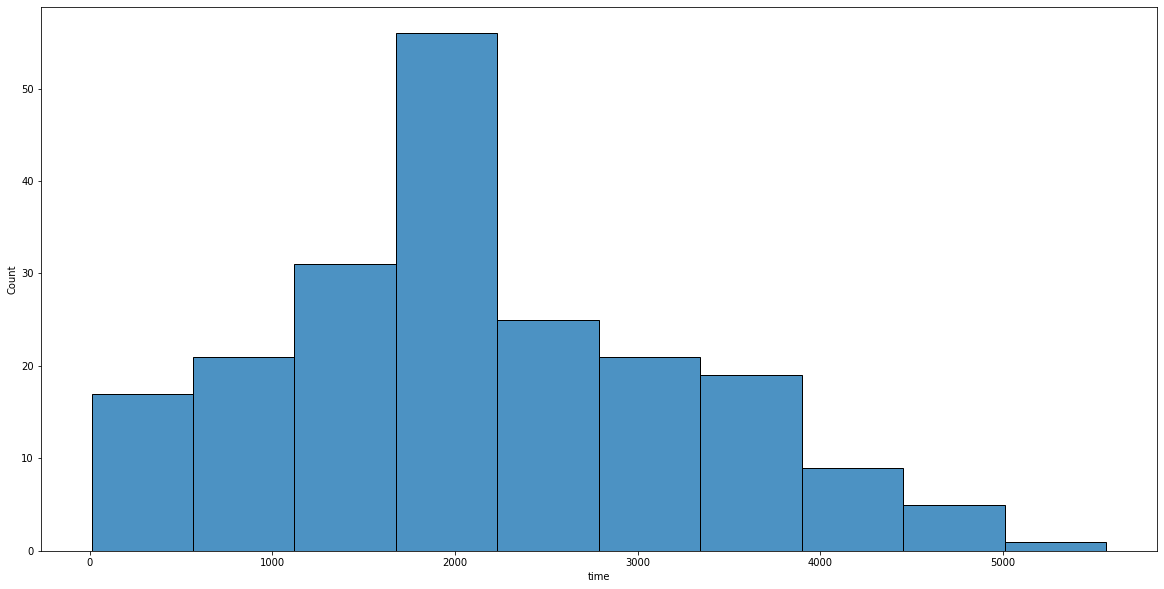

In [78]:
# Set the figure size to (20, 10) inches
plt.figure(figsize=(20,10))

# Create a histogram plot using Seaborn
sns.histplot(x='time',data=df,bins=10,edgecolor='black',alpha=0.8)

# Display the plot
plt.show()

**Observations**
- 50% of individuals who survive after the operation,live below approximately 5.5 years 
- The person that survived the operation and lived the longest survived for approximately 15 years(5565 days)
- The shortest periord of time a person lived after surviving the operation was 10 days 
- On average a person lives approxmimately 6 years (2500 days) after surviving the operation. 

### Status

In [124]:
df[['status']].value_counts()

status            
Alive                 134
Melanoma_death         57
Not_melanoma_death     14
dtype: int64

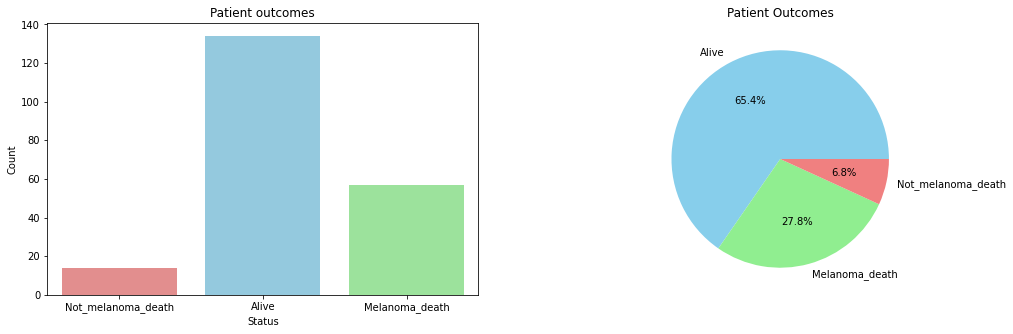

In [119]:
# Set the size of the figure
plt.figure(figsize=(17, 5))

# First subplot
plt.subplot(1, 2, 1)

# Create count plot using Seaborn
sns.countplot(x=df['status'],palette=['lightcoral','skyblue','lightgreen'])

# Set plot title and labels
plt.title('Patient outcomes')
plt.xlabel('Status')
plt.ylabel('Count')

# Second subplot
plt.subplot(1, 2, 2)

# Create pie chart
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])

# Set plot title and labels
plt.title('Patient Outcomes')
plt.ylabel('')

# Show plot
plt.show()


**Observations**
- The likelihood of patients surviving post-operation is notably elevated, with 65% of patients demonstrating survival, in contrast to 27% who succumbed to melanoma.

### Sex (i.e Patient's Gender)

In [123]:
df[['sex']].value_counts()

sex   
Female    126
Male       79
dtype: int64

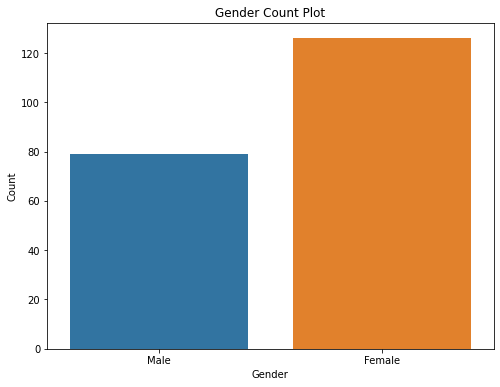

In [42]:
# Set figure size
plt.figure(figsize=(8, 6))  # Adjust width and height as needed


# Create count plot using Seaborn
sns.countplot(x=df['sex'])

# Set plot title and labels
plt.title('Gender Count Plot')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show plot
plt.show()

**Observations**

- The unequal gender distribution, with 126 females and 79 males in the sample, may introduce bias when assessing the success rate of a melanoma treatment. 

- Variances in physiological responses and risk factors between genders could lead to skewed results, making it difficult to generalize treatment effectiveness.

### Age

In [125]:
df[['age']].describe()

,age
count,205.000000
mean,52.463415
std,16.671711
min,4.000000
25%,42.000000
50%,54.000000
75%,65.000000
max,95.000000


/Users/jaynahalai/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



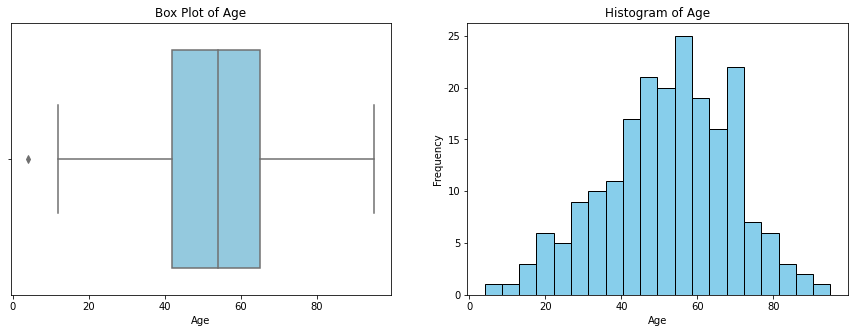

In [133]:
# Set the size of the figure
plt.figure(figsize=(15, 5))


# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(df['age'], color='skyblue')
plt.title('Box Plot of Age')
plt.xlabel('Age')


# Histogram
plt.subplot(1, 2, 2)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



**Observations**

- The Histogram above illustrates that majority of the sample is aged between 40 -75. 

- The box plot shows that there was an outlier with one individual in the sample that was 4 years old.This calls for further investigation. 

- Focusing on individuals predominantly aged between 40 and 75 may skew the assessment of treatment success. 

- Since other age groups are underrepresented, conclusions drawn from the sample may not accurately reflect treatment outcomes across all age demographics. 

### Year

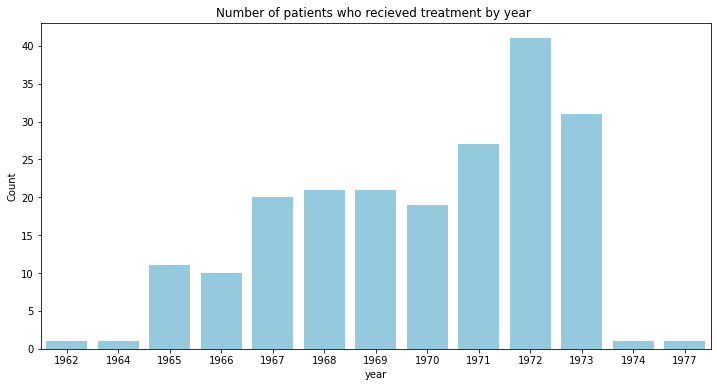

In [77]:
# Set figure size
plt.figure(figsize=(12, 6))  # Adjust width and height as needed


# Create count plot using Seaborn
sns.countplot(x=df['year'],color='Skyblue')

# Set plot title and labels
plt.title('Number of patients who recieved treatment by year ')
plt.xlabel('year')
plt.ylabel('Count')

# Show plot
plt.show()

**Observations**

- The grapgh above shows the distribution of individuals who received treatment for melanoma across different years. 

- The highest number of treatments occurred in 1972, with 41 individuals, followed by 1973 with 31 individuals. 

- Treatment numbers decline steadily in subsequent years, with minimal representation in earlier and later years, such as 1964 and 1977, each having only one recorded treatment.

### Thickness

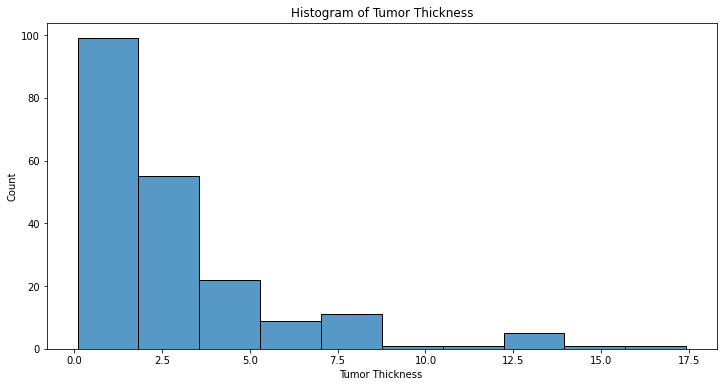

In [136]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create count plot using Seaborn

sns.histplot(x='thickness',data=df,bins=10)

# Set plot title and labels
plt.title('Histogram of Tumor Thickness')
plt.xlabel('Tumor Thickness ')


plt.show()

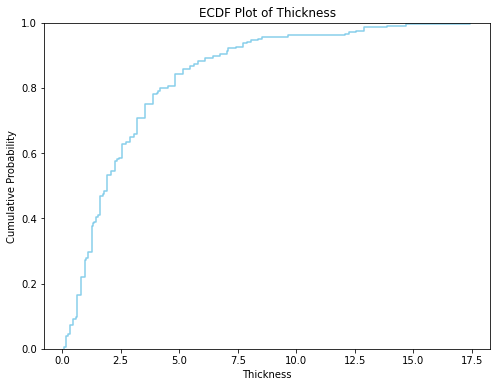

In [50]:
# ECDF Plot
plt.figure(figsize=(8, 6))
sns.ecdfplot(df['thickness'], color='skyblue')
plt.title('ECDF Plot of Thickness')
plt.xlabel('Thickness')
plt.ylabel('Cumulative Probability')
plt.show()

**Observation**

- The majority of tumors measured between 0 and 5 millimeters in thickness, with only a small number reaching 7.5 millimeters.
- The probability of patients having a tumor below 2.5mm is 0.63

### Ulcer

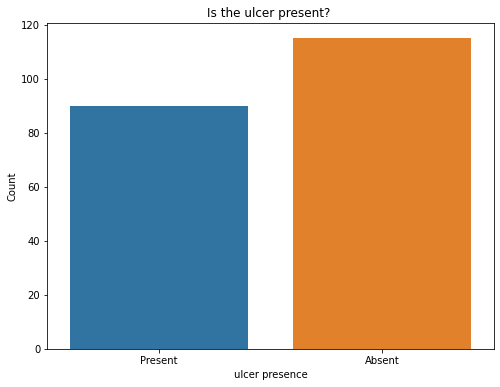

In [51]:
# Set figure size
plt.figure(figsize=(8, 6))  # Adjust width and height as needed

# Create count plot using Seaborn
sns.countplot(x=df['ulcer'])

# Set plot title and labels
plt.title('Is the ulcer present? ')
plt.xlabel('ulcer presence')
plt.ylabel('Count')

# Show plot
plt.show()


**Observation**
The data indicates that out of the total number of patients, 115 had no ulcer present, while 90 patients had ulcers present.

# Bivariate Anlaysis

** Relevant Questions Asked **
- What is the average survival/duration for each status category?
- Is there a difference in survival duration between males and females?
- How does age correlate with survival time?
- How does the year of operation relate to survival time?
- What is the association between tumor thickness and survival time?
- How does the presence or absence of ulcers affect survival duration?
- Is there a correlation between the status of the patient and their sex?
- How does the patient's status relate to the year of operation?
- What is the connection between the patient's status and tumor thickness?
- In what scenarios does the presence of ulcers coincide with patient survival?
- How does age differ between males and females?
- Is there a relationship between age and tumor thickness?
- How does age relate to the presence of ulcers?
- What is the correlation between the year of operation and tumor thickness?
- How does the year of operation relate to the presence of ulcers?

In [74]:
def labelled_barchart(x,y,data,colour='teal',figure_size=(8,5)):
    """ 
    Plot a barchart with labels displayed on the bars.

    Parameters:
    """
    #Set figure size 
    plt.figure(figsize=figure_size)
    
    #Plotting the barchart
    ax=sns.barplot(x=x,y=y,data=data,color=colour,ci=None)
    # Insert a title 
    ax.set_title('Survival Time per Gender',fontdict={'fontsize':18})
    #Taking off the figure frames 
    sns.despine( top=True, right=True, left=True, bottom=True)
    #clearing the xlabel,ylabels and y ticks 
    ax.set(xlabel='',ylabel='',yticks=[])
    

    # setting the xtick size to 12
    ax.tick_params(axis='x', labelsize=12)
    
    #looping through the bars
    for bar in ax.patches:
        #getting the height of each bar 
        bar_height=bar.get_height()
        #putting the bar height as labels on each bar 
        ax.text(x=bar.get_x()+(bar.get_width()/2),y=bar_height-480,s='{:.2f}'.format(bar_height),
                ha='center',color='white',fontdict={'fontsize':18})
        
    
    plt.show()

**On average,how many days did patience survive after they had their tumour removed?**

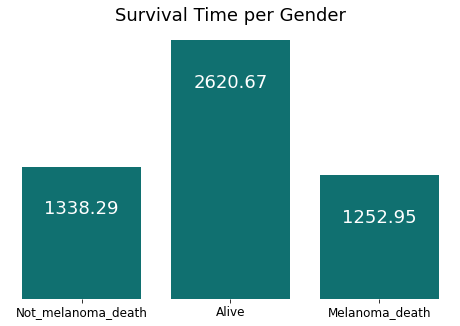

In [76]:
labelled_barchart('status','time',data=df)

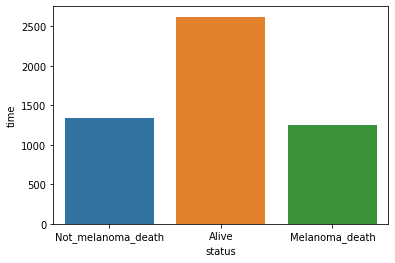

In [52]:
sns.barplot(x='status',y='time',data=df,ci=None);

**On average, which gender survived the longest?**


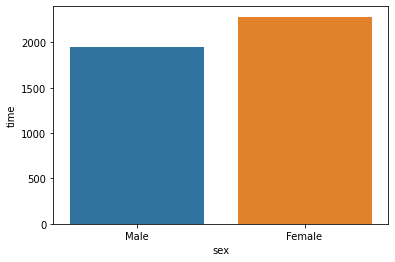

In [53]:
sns.barplot(x='sex',y='time',data=df,ci=None);

**On average, what age category did pateients survive the longest?**

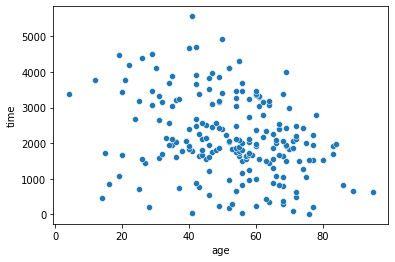

In [54]:
sns.scatterplot(x='age',y='time',data=df);

Observation: there is no relationship between age and time 

**Relationship between age, time and status**

In [ ]:
sns.scatterplot(x='age',y='time',data=df,hue='status');

**What is the relationship between time and year?**

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x='year',y='time',data=df,ci=None,color='teal');

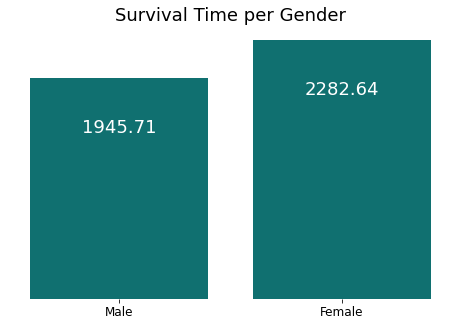

In [75]:
labelled_barchart('sex','time',data=df)

# Hypothesis Testing 

- what is the relationship between sex and ulcer ? ( chi square )
- what is the relationship between gender and time?(t-test)
- What is the relationship between status and sex?(chi square )
- what is the relationship between thickness and sex?(t-test)

What is the relationship between sex and ulcer ?

H0:sex and ulcer are independent 

H1:sex and ulcer are dependent 

alpha = 0.05

In [ ]:
# contingency table
tabulation = pd.crosstab(index= df['sex'],columns=df['ulcer'])
tabulation

In [ ]:
pd.crosstab(index= df['sex'],columns=df['ulcer'],normalize='index')*100

In [ ]:
chi2,p,dof,exp = stats.chi2_contingency(tabulation)
print('chi2 :',chi2)
print( )
print('p_value:',p)
print( )
print('Degree of freedom:',dof)
print( )
print('Expected frequency:',exp)

### Conclusion: 
If the P value is smaller we reject the null hypothesis. 

At a significance level of 0.05,p-value =0.0237 < 0.05,therefore we reject the null hypothesis and conclude that ulcer infection is associated with gender. 


In [ ]:
# - What is the relationship between status and sex?(chi square )
tabulation_1 = pd.crosstab(index= df['sex'],columns=df['status'])
tabulation_1

In [ ]:
tabulation_1 = pd.crosstab(index= df['sex'],columns=df['status'],normalize='index')*100
tabulation_1

In [ ]:
chi2,p,dof,exp = stats.chi2_contingency(tabulation_1)
print('chi2 :',chi2)
print( )
print('p_value:',p)
print( )
print('Degree of freedom:',dof)
print( )
print('Expected frequency:',exp)

### Conclusion: 
If the P value is smaller we reject the null hypothesis. 

At a significance level of 0.05,p-value =0.03 < 0.05,therefore we reject the null hypothesis and conclude that status(i.e patient outcome ) is associated with gender. 


In [ ]:
# - what is the relationship between gender and time?(t-test)
df.groupby('sex')['time'].mean()

In [ ]:
plt.hist(x=df['time'],bins=20)

In [ ]:
Male = df[df['sex'] == 'Male']['time'].values


Female = df[df['sex'] == 'Female']['time'].values

### Hypothesis:
- H0= Famales and Males live the same amount of time(Uf=Um)
- H1= Females live longer than males (Uf>Um)
- alpha: 0.05

**conducting a t-test**

In [ ]:
test_results = pingouin.ttest(x=Female, 
                              y=Male,
                              paired = False,
                             tail='greater')


In [ ]:
test_results

### Conclusion: 
If the P value is smaller we reject the null hypothesis. 

At a significance level of 0.05,p-value =0.019 < 0.05,therefore we reject the null hypothesis and conclude that females live longer than males after surviving the operation 

In [ ]:
# what is the relationship between thickness and sex?(t-test)

In [ ]:
df

### Hypothesis:
- H0= Males and females both have the same tumor thickness in millimeters 
- H1=Males have thicker tumors thickness in millimeters
- alpha: 0.05

In [ ]:
Male_1 = df[df['sex'] == 'Male']['thickness'].values


Female_1 = df[df['sex'] == 'Female']['thickness'].values

In [ ]:
Female_1

**conducting a t-test**

In [ ]:
test_results = pingouin.ttest(x=Male_1, 
                              y=Female_1,
                              paired = False,
                             tail='greater')


In [ ]:
test_results

### Conclusion: 
If the P value is smaller we reject the null hypothesis. 

At a significance level of 0.05,p-value =0.005046 < 0.05,therefore we reject the null hypothesis and conclude that Males have thicker tumors than females 